In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar el csv de cada juego
games_csv = pd.read_csv('games.csv');

#Cargar el csv de cada ronda
rounds_csv = pd.read_csv('rounds_in_games.csv');


# WORDS

Distribución de preguntas por número de letras

word
5     10
6      1
7      6
8      6
9      2
10     7
11     1
dtype: int64


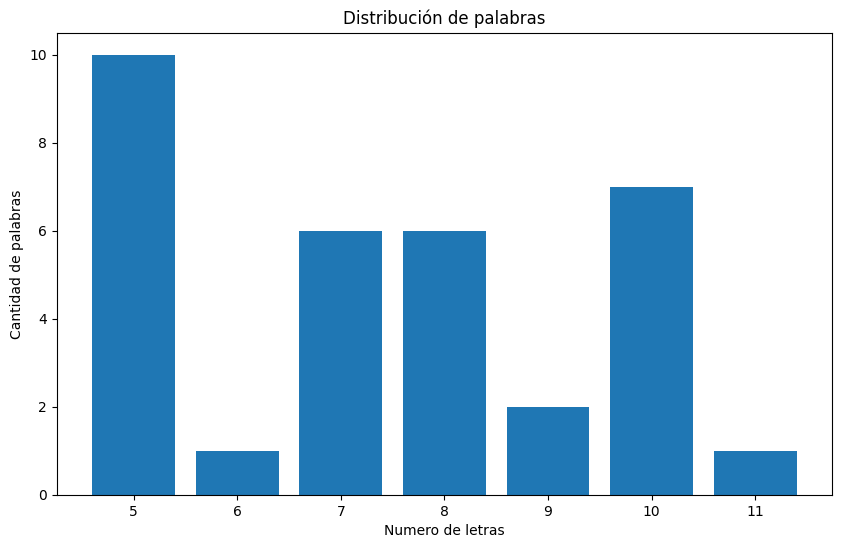

In [ ]:
words_distribution = rounds_csv.groupby(rounds_csv['word'].str.len()).size().sort_index();
print(words_distribution);

plt.figure(figsize=(10,6));
plt.bar(words_distribution.index,words_distribution.values);
plt.xlabel("Numero de letras");
plt.ylabel("Cantidad de palabras");
plt.title("Distribución de palabras");
plt.show();

# ROUNDS

Distribución de usuarios diferentes

In [ ]:
number_users = games_csv['username'].nunique();
print (number_users)

6


Usuarios que más rondas han ganado por partida

                                game_id  username  rounds
9  e30bde98-647c-4ec7-a8e1-e78bbcbc103c      Kike       3
0  01b550ec-5c07-464d-8ddf-86be5f98805f     Edgar       2
1  45b033bd-e348-4ff6-9808-90612288984c     Edgar       2
2  4f6a803a-a346-46f2-9f49-2558fe852e88  Jennifer       2
3  8c9d509d-3031-45b2-96a4-d3f3e2cf2802      Kike       2


<Figure size 1000x600 with 0 Axes>

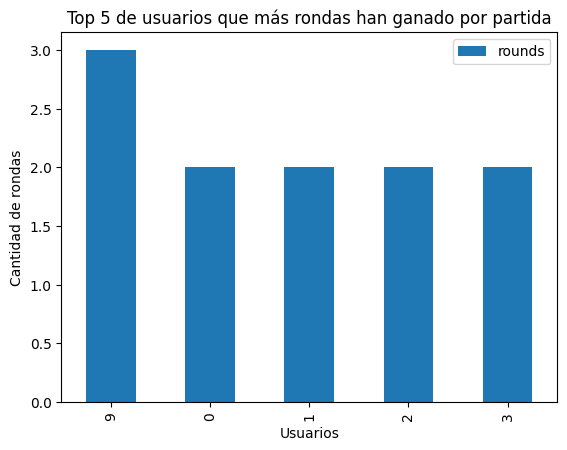

In [15]:
rounds_won = rounds_csv[rounds_csv['victory']==True].groupby(['game_id','username']).size().reset_index(name='rounds').sort_values(by = ['rounds'], ascending=False).head(5);
print (rounds_won);

plt.figure(figsize=(10,6));
rounds_won.plot(kind="bar");
plt.xlabel("Usuarios");
plt.ylabel("Cantidad de rondas");
plt.title("Top 5 de usuarios que más rondas han ganado por partida");

# GAME

5 Usuarios con más puntuación final

username
Kike        10
Edgar        6
Jennifer     6
Pepe         1
Rodolfo      1
Name: score, dtype: int64


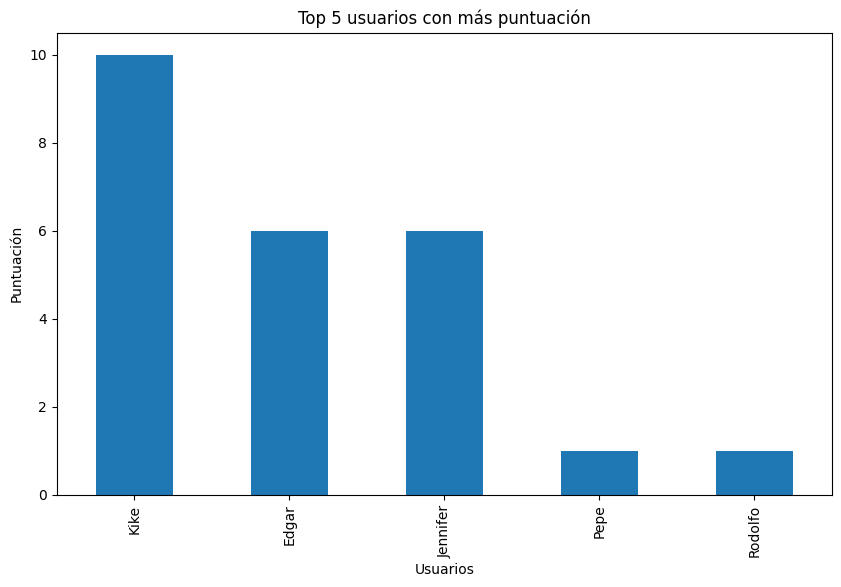

In [ ]:
users_by_score = games_csv.groupby('username')['score'].sum().nlargest(5);
print (users_by_score);

plt.figure(figsize=(10,6));
users_by_score.plot(kind="bar");
plt.xlabel("Usuarios");
plt.ylabel("Puntuación");
plt.title('Top 5 usuarios con más puntuación');


5 Usuarios con más puntuación media

username
Edgar       2.0
Jennifer    2.0
Kike        2.0
Pepe        1.0
Rodolfo     1.0
Name: score, dtype: float64


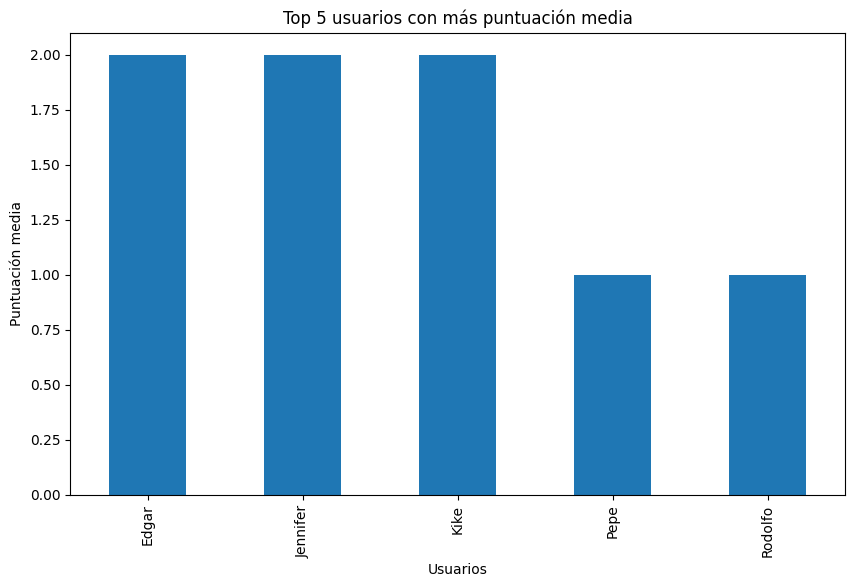

In [ ]:
users_by_avg = games_csv.groupby('username')['score'].mean().nlargest(5);
print (users_by_avg);

plt.figure(figsize=(10,6));
users_by_avg.plot(kind="bar");
plt.xlabel("Usuarios");
plt.ylabel("Puntuación media");
plt.title('Top 5 usuarios con más puntuación media');

Distribución de las puntuaciones (historigrama)

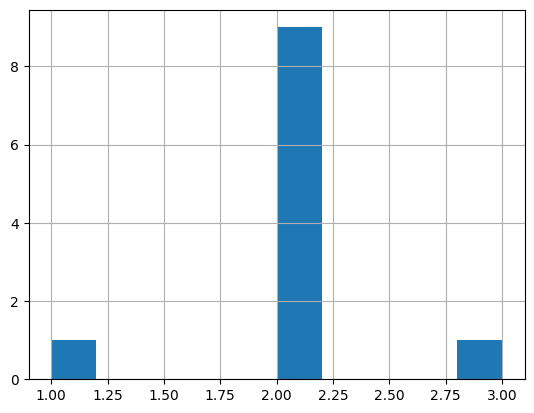

In [ ]:
games_csv['score'].hist();